# PRÁCTICA: Web Scraping de Comentarios de YouTube y Análisis de Sentimiento

Esta práctica es un ejercicio completo que obliga al alumno a lidiar con datos no estructurados obtenidos de una fuente con carga dinámica  para luego limpiarlos y analizarlos.

**Objetivos de la Práctica**

1. Web Scraping Avanzado: Utilizar una librería que maneje la carga dinámica de contenido para extraer comentarios de un video de YouTube.

2. Preprocesamiento: Implementar funciones de limpieza de texto robustas, adecuadas para comentarios de redes sociales.

3. Análisis de Sentimiento: Clasificar la polaridad emocional de cada comentario.

**Requisitos e Instalación**

Para esta práctica, se requiere la librería de transcripciones de YouTube y las herramientas estándar de PLN:

In [8]:
# Instalación de librerías necesarias
!pip install youtube-comment-downloader pandas nltk

Could not find platform independent libraries <prefix>


### OBJETIVOS: 

#### 1. Web Scraping de Comentarios (Carga Dinámica)


A diferencia de las páginas estáticas, YouTube carga los comentarios a medida que el usuario se desplaza hacia abajo (carga dinámica con JavaScript). Esto requiere herramientas que puedan simular esta interacción. La librería youtube-comment-scraper-python simplifica esto.

Tarea 1: Extraer Comentarios y Crear el Dataset
Elige un video en español y obtén su URL completa. Se recomienda limitar el número de comentarios para que el tiempo de ejecución sea razonable.

In [9]:
# Tarea 1: Extraer Comentarios y Crear el Dataset
from youtube_comment_downloader import *
import pandas as pd
import time

# URLs de los videos de YouTube para comparar
videos = {
    'Equipo - Hércules': "https://www.youtube.com/watch?v=uYnSfDhhzKE",
    'Tierra - Alicante': "https://www.youtube.com/watch?v=ivwiICUmmjg"
}

# Función para extraer comentarios de un video
def extraer_comentarios(url, limite=100):
    downloader = YoutubeCommentDownloader()
    comentarios = []
    
    for comment in downloader.get_comments_from_url(url, sort_by=SORT_BY_POPULAR):
        comentarios.append({
            'autor': comment.get('author', 'Desconocido'),
            'texto': comment.get('text', ''),
            'likes': comment.get('votes', 0),
            'fecha': comment.get('time', '')
        })
        
        if len(comentarios) >= limite:
            break
    
    return comentarios

# Extraer comentarios de ambos videos
resultados = {}
print("="*60)
print("EXTRACCIÓN DE COMENTARIOS DE YOUTUBE")
print("="*60)

for nombre, url in videos.items():
    print(f"\nExtrayendo comentarios de: {nombre}")
    comentarios = extraer_comentarios(url, limite=100)
    df = pd.DataFrame(comentarios)
    resultados[nombre] = df
    print(f"   {len(df)} comentarios extraídos")

# Mostrar primeros comentarios de cada video
for nombre, df in resultados.items():
    print(f"\n--- Primeros 3 comentarios de: {nombre} ---")
    print(df[['autor', 'texto']].head(3).to_string(index=False))

print(f"\n{'='*60}")

EXTRACCIÓN DE COMENTARIOS DE YOUTUBE

Extrayendo comentarios de: Equipo - Hércules
   100 comentarios extraídos

Extrayendo comentarios de: Tierra - Alicante
   100 comentarios extraídos

Extrayendo comentarios de: Tierra - Alicante
   100 comentarios extraídos

--- Primeros 3 comentarios de: Equipo - Hércules ---
       autor                                                                       texto
 @marioherga Un orgullo haber Dirigido este proyecto ¡Viva Alicante y Macho Hércules! 🤍💙
     @fectro                             un HONOR producir esta JOYA.  MACHO HÉRCULES 💙🤍
@frangambin_           Esto sí que me da envidia, enhorabuena desde Murcia herculanos! 🥹

--- Primeros 3 comentarios de: Tierra - Alicante ---
                 autor                                                                                              texto
@irisfajardogarcia3305                                                                      El fary de nuestra generación
         @oscaronortes        

#### 2. Limpieza de Texto (Preprocesamiento)

Los comentarios de YouTube contienen ruido típico de redes sociales: emojis, menciones, puntuación excesiva, y a veces, URLs. La limpieza es crucial para aislar las palabras que llevan la carga emocional.

Tarea 2: Implementar y Aplicar la Función de Limpieza
Crea una función llamada limpiar_comentario que purifique los datos.

In [10]:
# Tarea 2: Implementar y Aplicar la Función de Limpieza
import re

def limpiar_comentario(texto):
    """
    Limpia el texto del comentario eliminando elementos no deseados.
    """
    if not isinstance(texto, str):
        return ""
    
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    
    # Eliminar menciones (@usuario)
    texto = re.sub(r'@\w+', '', texto)
    
    # Eliminar hashtags pero mantener el texto (#ejemplo -> ejemplo)
    texto = re.sub(r'#', '', texto)
    
    # Eliminar emojis y caracteres especiales, mantener letras, números y espacios
    texto = re.sub(r'[^\w\s]', ' ', texto)
    
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    
    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    
    # Eliminar espacios al inicio y final
    texto = texto.strip()
    
    return texto

# Aplicar limpieza a todos los comentarios de ambos videos
print("="*60)
print("LIMPIEZA DE COMENTARIOS")
print("="*60)

for nombre, df in resultados.items():
    df['texto_limpio'] = df['texto'].apply(limpiar_comentario)
    # Filtrar comentarios vacíos
    df_filtrado = df[df['texto_limpio'] != '']
    resultados[nombre] = df_filtrado
    
    print(f"\n{nombre}: {len(df_filtrado)} comentarios válidos después de limpieza")
    print("\nEjemplo de limpieza:")
    if len(df_filtrado) > 0:
        ejemplo = df_filtrado.iloc[0]
        print(f"  Original: {ejemplo['texto'][:80]}...")
        print(f"  Limpio: {ejemplo['texto_limpio'][:80]}...")

print(f"\n{'='*60}")

LIMPIEZA DE COMENTARIOS

Equipo - Hércules: 97 comentarios válidos después de limpieza

Ejemplo de limpieza:
  Original: Un orgullo haber Dirigido este proyecto ¡Viva Alicante y Macho Hércules! 🤍💙...
  Limpio: un orgullo haber dirigido este proyecto viva alicante y macho hércules...

Tierra - Alicante: 97 comentarios válidos después de limpieza

Ejemplo de limpieza:
  Original: El fary de nuestra generación...
  Limpio: el fary de nuestra generación...



#### 3. Análisis de Sentimiento

Aplicaremos el método Lexical para el Análisis de Sentimiento. Cada comentario será clasificado individualmente para obtener una visión de la polaridad general de la audiencia del video.

Tarea 3: Implementar el Clasificador y Analizar los Resultados
Define los léxicos y clasifica cada comentario.

ANÁLISIS COMPARATIVO DE SENTIMIENTOS

Equipo - Hércules
   Total comentarios: 97

   Distribución:
   - Positivo: 31 (31.96%)
   - Neutral: 66 (68.04%)
   - Negativo: 0 (0%)

Tierra - Alicante
   Total comentarios: 97

   Distribución:
   - Positivo: 14 (14.43%)
   - Neutral: 83 (85.57%)
   - Negativo: 0 (0%)


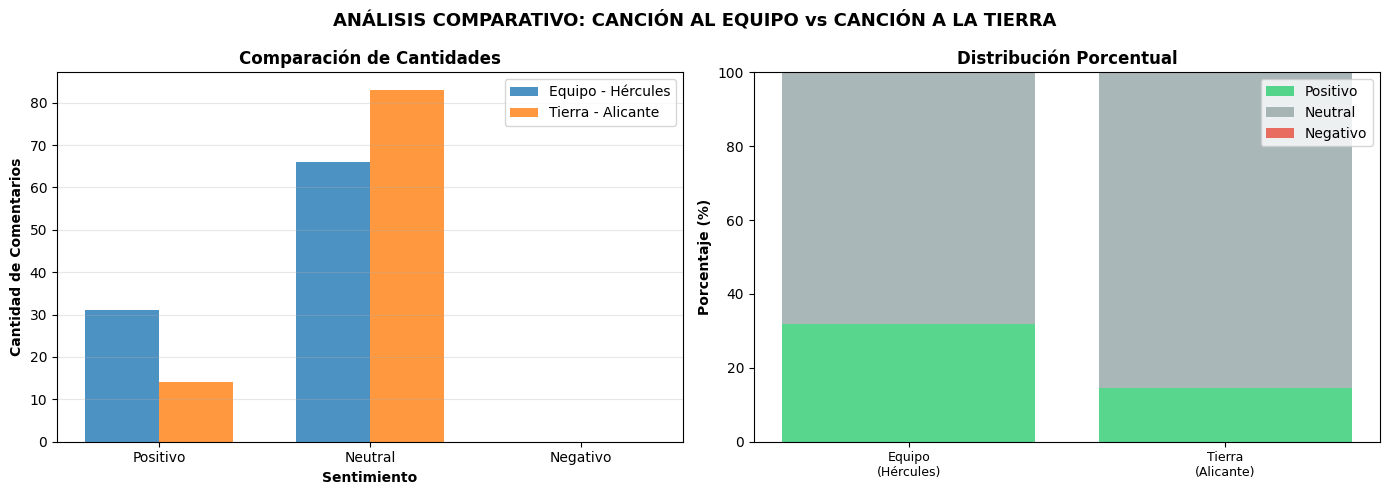


EJEMPLOS DE COMENTARIOS POR SENTIMIENTO

Equipo - Hércules

  POSITIVO:
    - Un orgullo haber Dirigido este proyecto ¡Viva Alicante y Macho Hércules! 🤍💙...
    - Soy del Málaga pero este himno es increíble, me ha puesto los pelos de punta...

  NEUTRAL:
    - un HONOR producir esta JOYA.  MACHO HÉRCULES 💙🤍...
    - Esto sí que me da envidia, enhorabuena desde Murcia herculanos! 🥹...

Tierra - Alicante

  POSITIVO:
    - Este cambio de estilo me encanta, es muy diferente a lo q estoy acostumbrado a escuchar y ...
    - Buena esa Funzo, te has hecho inmortal con este temazo! ojo soy de Colombia! ❤...

  NEUTRAL:
    - El fary de nuestra generación...
    - Espero que en todas las barracas pongan esta canción no pido menos...

ANÁLISIS COMPLETADO


In [11]:
# Tarea 3: Implementar el Clasificador y Analizar los Resultados

# Definir léxicos de sentimiento en español
palabras_positivas = {
    'bueno', 'excelente', 'genial', 'increíble', 'maravilloso', 'fantástico',
    'hermoso', 'perfecto', 'amor', 'feliz', 'alegre', 'gustar', 'gusta',
    'encanta', 'mejor', 'éxito', 'gracias', 'bendiciones', 'buen', 'buena',
    'espectacular', 'impresionante', 'extraordinario', 'magnífico', 'súper',
    'cool', 'interesante', 'inspirador', 'motivador', 'positivo', 'bonito',
    'lindo', 'agradable', 'divertido', 'gracioso', 'emocionante', 'favorito',
    'precioso', 'bella', 'bello', 'grande', 'orgullo', 'orgulloso'
}

palabras_negativas = {
    'malo', 'terrible', 'horrible', 'pésimo', 'odio', 'odiar', 'triste',
    'tristeza', 'aburrido', 'feo', 'disgusto', 'molesto', 'enfadado', 'mal',
    'peor', 'basura', 'desastre', 'decepcionante', 'lamentable', 'negativo',
    'desagradable', 'fallo', 'error', 'problema', 'lastima', 'pena', 'asco'
}

def analizar_sentimiento(texto):
    """
    Clasifica el sentimiento del texto como Positivo, Negativo o Neutral.
    """
    if not texto:
        return 'Neutral'
    
    palabras = texto.lower().split()
    
    # Contar palabras positivas y negativas
    count_positivo = sum(1 for palabra in palabras if palabra in palabras_positivas)
    count_negativo = sum(1 for palabra in palabras if palabra in palabras_negativas)
    
    # Clasificar según el balance
    if count_positivo > count_negativo:
        return 'Positivo'
    elif count_negativo > count_positivo:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar análisis de sentimiento a ambos videos
print("="*60)
print("ANÁLISIS COMPARATIVO DE SENTIMIENTOS")
print("="*60)

analisis_comparativo = {}

for nombre, df in resultados.items():
    df['sentimiento'] = df['texto_limpio'].apply(analizar_sentimiento)
    distribucion = df['sentimiento'].value_counts()
    porcentajes = (distribucion / len(df) * 100).round(2)
    
    analisis_comparativo[nombre] = {
        'df': df,
        'distribucion': distribucion,
        'porcentajes': porcentajes
    }
    
    print(f"\n{nombre}")
    print(f"   Total comentarios: {len(df)}")
    print(f"\n   Distribución:")
    for sent in ['Positivo', 'Neutral', 'Negativo']:
        count = distribucion.get(sent, 0)
        pct = porcentajes.get(sent, 0)
        print(f"   - {sent}: {count} ({pct}%)")

# Crear visualización comparativa simplificada
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Configuración de colores
colors_dict = {'Positivo': '#2ecc71', 'Neutral': '#95a5a6', 'Negativo': '#e74c3c'}
nombres_videos = list(analisis_comparativo.keys())
sentimientos = ['Positivo', 'Neutral', 'Negativo']

# 1. Gráfico de barras comparativo
ax1 = axes[0]
for i, nombre in enumerate(nombres_videos):
    datos = analisis_comparativo[nombre]
    values = [datos['distribucion'].get(s, 0) for s in sentimientos]
    x = np.arange(len(sentimientos))
    width = 0.35
    offset = width * (i - 0.5)
    ax1.bar(x + offset, values, width, label=nombre, alpha=0.8)

ax1.set_xlabel('Sentimiento', fontweight='bold')
ax1.set_ylabel('Cantidad de Comentarios', fontweight='bold')
ax1.set_title('Comparación de Cantidades', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(sentimientos)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Gráfico de barras apiladas con porcentajes
ax2 = axes[1]
bottom = np.zeros(len(nombres_videos))
x_pos = np.arange(len(nombres_videos))

for sentimiento in sentimientos:
    values = [analisis_comparativo[n]['porcentajes'].get(sentimiento, 0) for n in nombres_videos]
    ax2.bar(x_pos, values, bottom=bottom, label=sentimiento, 
            color=colors_dict[sentimiento], alpha=0.8)
    bottom += values

ax2.set_ylabel('Porcentaje (%)', fontweight='bold')
ax2.set_title('Distribución Porcentual', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['Equipo\n(Hércules)', 'Tierra\n(Alicante)'], fontsize=9)
ax2.legend()
ax2.set_ylim(0, 100)

plt.suptitle('ANÁLISIS COMPARATIVO: CANCIÓN AL EQUIPO vs CANCIÓN A LA TIERRA', 
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar ejemplos de comentarios
print(f"\n{'='*60}")
print("EJEMPLOS DE COMENTARIOS POR SENTIMIENTO")
print("="*60)

for nombre in nombres_videos:
    df = analisis_comparativo[nombre]['df']
    print(f"\n{nombre}")
    
    for sentimiento in ['Positivo', 'Neutral', 'Negativo']:
        ejemplos = df[df['sentimiento'] == sentimiento].head(2)
        if len(ejemplos) > 0:
            print(f"\n  {sentimiento.upper()}:")
            for idx, row in ejemplos.iterrows():
                print(f"    - {row['texto'][:90]}...")

print(f"\n{'='*60}")
print("ANÁLISIS COMPLETADO")
print("="*60)